In [1]:
%matplotlib inline

In [41]:
import pyathena as pa
from pyathena.set_plt import *
coolftn=pa.coolftn()
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [4]:
pid='MHD_4pc_new'
itime=450

In [5]:
fname='{}{}/id0/{}.{:04d}.vtk'.format(base,pid,pid,itime)

In [6]:
ds=pa.AthenaDataSet(fname)

In [7]:
nH=ds.read_all_data('density')

In [8]:
temp=coolftn.get_temp(ds.read_all_data('T1'))

In [51]:
B=ds.read_all_data('magnetic_field')

B1=B[...,0]
B2=B[...,1]
B3=B[...,2]

In [55]:
vel=ds.read_all_data('velocity')

v1=vel[...,0]
v2=vel[...,1]
v3=vel[...,2]


In [9]:
Nz,Ny,Nx=nH.shape

In [10]:
x,y,z=pa.cc_arr(ds.domain)

In [11]:
le=ds.domain['left_edge']
re=ds.domain['right_edge']
xextent=np.array([le[1],re[1],le[2],re[2]])/1.e3

In [12]:
zmin=1000
zmax=3000
kidx=(z>zmin) & (z< zmax)
dz=z[1]-z[0]

In [13]:
xextent=np.array([le[1],re[1],z[kidx].min()-0.5*dz,z[kidx].max()+0.5*dz])/1.e3

iidx=Nx/2+50

Bx=B2[kidx,:,iidx]
By=B3[kidx,:,iidx]

vx=v2[kidx,:,iidx]
vy=v3[kidx,:,iidx]

In [16]:
ds.domain['time']*units['Myr']

440.00669531135213

In [121]:
plt.rcParams['image.interpolation']='bilinear'

In [122]:

def plot_slices(fig,idx):
    nslice=nH[kidx,:,idx]
    Tslice=temp[kidx,:,idx]
    Bx= B2[kidx,:,idx]/np.sqrt(nslice)
    By= B3[kidx,:,idx]/np.sqrt(nslice)
    vx= v2[kidx,:,idx]
    vy= v3[kidx,:,idx]

    plt.rcParams['font.size']=16
    from mpl_toolkits.axes_grid1 import ImageGrid
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, 2),
                     axes_pad=0.2,
                     add_all=True,
                     label_mode="L",
                     cbar_mode="each",
                     cbar_location='top',
                    )
    im1=grid[0].imshow(nslice,norm=LogNorm(),origin='lower',
               clim=(5.e-5,1),cmap=plt.cm.bone_r,extent=xextent)
    #limits = np.nanmean(licmapv.flatten()) + np.array([-1,1])*3*np.nanstd(licmapv.flatten())
    #im1_lic=grid[0].imshow(licmapv, origin='lower', alpha=0.2, cmap='binary', clim=limits,extent=xextent)
    Nskip=8
    vvec=grid[0].quiver(y[::Nskip]/1.e3,z[kidx][::Nskip]/1.e3,
                           vx[::Nskip,::Nskip],vy[::Nskip,::Nskip],scale=3000)
    grid[0].quiverkey(vvec, X=-0.4, Y=3.04, U=200,label='',coordinates='data')
    grid[0].text(-0.3,3.04,'v=200km/s',va='center',fontsize=10)

    im2=grid[1].imshow(Tslice,norm=LogNorm(),origin='lower',
               clim=(5000,1.e7),cmap=plt.cm.RdYlGn_r,extent=xextent)
    #limits = np.nanmean(licmapB.flatten()) + np.array([-1,1])*3*np.nanstd(licmapB.flatten())
    #im2_lic=grid[1].imshow(licmapB, origin='lower', alpha=0.2, cmap='binary', clim=limits,extent=xextent)


    #Nskip=8
    #im1_vec=grid[0].quiver(y[::Nskip]/1.e3,z[kidx][::Nskip]/1.e3,Bx[::Nskip,::Nskip],By[::Nskip,::Nskip],
    #                       alpha=0.5,color='b',scale=2048)


    cb1=plt.colorbar(im1,cax=grid[0].cax,orientation='horizontal')
    cb1.set_label(r'Number Density [${\rm cm^{-3}}$]',fontsize='small')
    cb2=plt.colorbar(im2,cax=grid[1].cax,orientation='horizontal')
    cb2.set_label(r'Temperature [$K$]',fontsize='small')
    #cb2.set_label(r'Gas Temperature [$K$]')
    for g in grid:
        g.cax.xaxis.tick_top()
        g.cax.xaxis.set_label_position('top')
        g.cax.tick_params(labelsize='small')
    #cb2=grid[1].cax.colorbar(im2)
    #cb1.orientation
    #grid[0].set_axis_off()
    #grid[1].set_axis_off()
    #grid[0].xaxis.set_minor_locator(minorLocator)
    grid[0].set_xlabel('x [kpc]')
    grid[0].set_ylabel('z [kpc]')
    grid[0].set_yticks([1,1.5,2,2.5,3])
    #grid[1].plot([0.2,0.4],[2.85,2.85],lw=6,color='w')
    grid[1].plot([0.2,0.4],[2.85,2.85],lw=4,color='k')


    grid[1].text(0.3,2.9,'200 pc',ha='center',**pa.texteffect())
    grid[1].set_xticklabels('')
    return fig


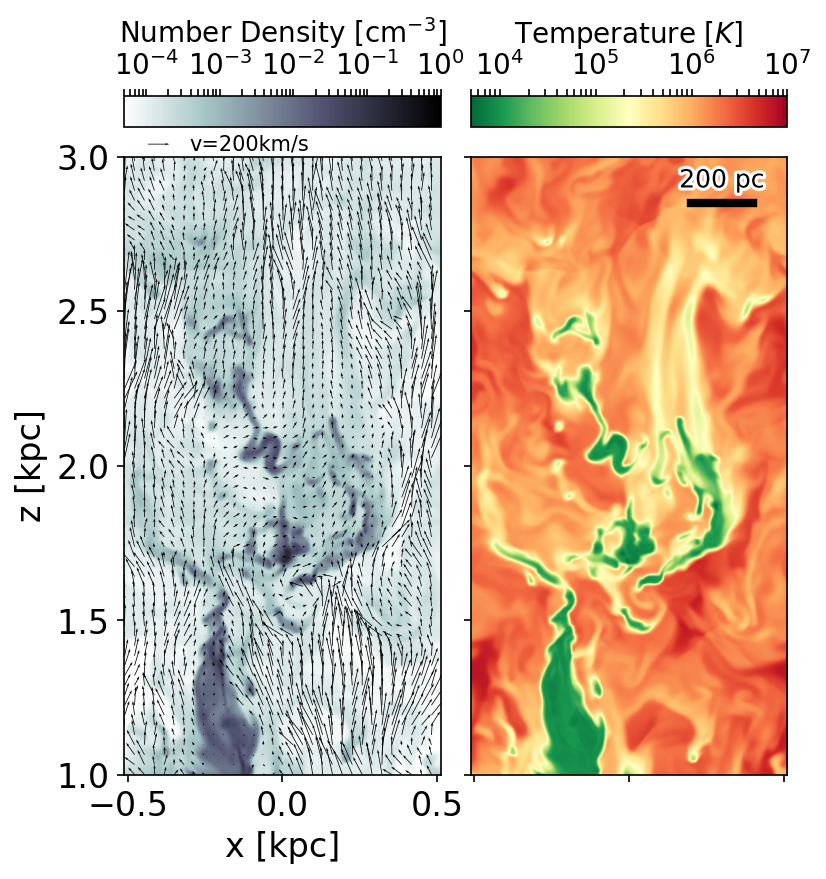

In [123]:
fig=plot_slices(plt.figure(),128)

fig.savefig('../slices/slices_nH_T.pdf',bbox_inches='tight',dpi=150)
fig.savefig('../slices/slices_nH_T.png',bbox_inches='tight',dpi=150)

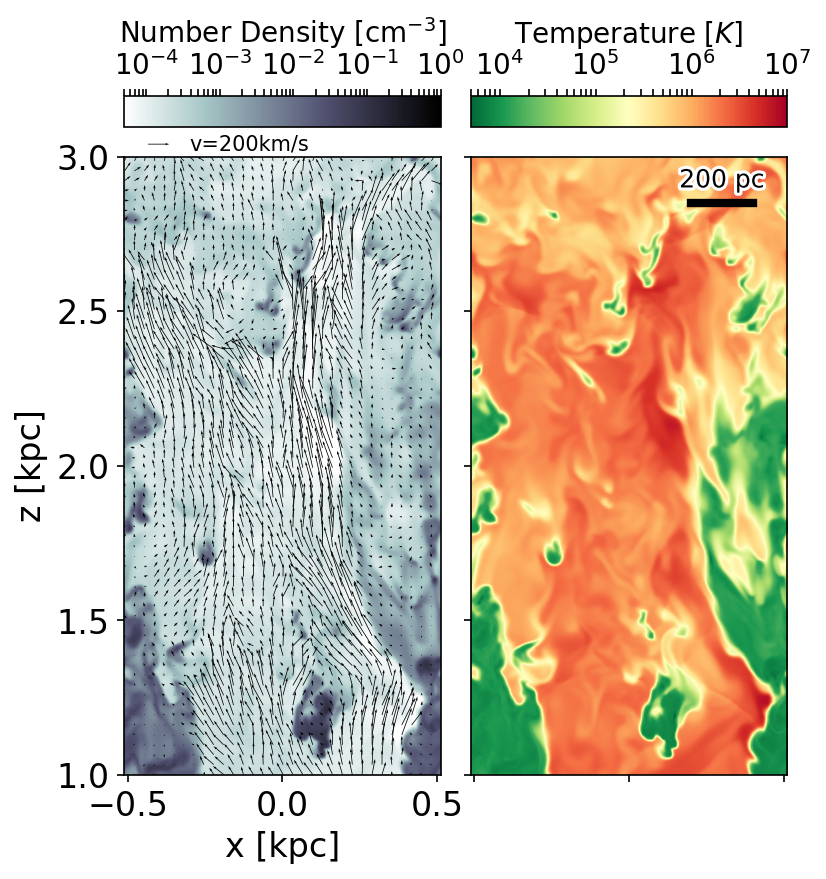

In [129]:
fig=plt.figure()
for i in range(0,256):
    fig.clf()
    fig=plot_slices(fig,i)
    fig.savefig('../slices/slices_nH_T.{:04d}.png'.format(i),bbox_inches='tight',dpi=150)